In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,CategoricalNB


In [2]:
maga = pd.read_excel('/Users/yangzhongxuan/Library/Containers/com.microsoft.Excel/Data/Desktop/ALY6020/marketing_campaign.excel',
                  sep = '\t')

In [3]:
maga.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
maga.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
n_maga = maga[['ID','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
    'AcceptedCmp5','Complain','Dt_Customer','Education','Marital_Status',
    'Kidhome','Teenhome','Income','MntFishProducts','MntMeatProducts',
    'MntFruits','MntSweetProducts','MntWines','MntGoldProds',
    'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases',
    'NumWebPurchases','NumWebVisitsMonth','Recency']]

In [57]:
n_maga.isnull().sum(axis = 0)
n_maga.isnull().sum()

ID                     0
Response               0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Complain               0
Dt_Customer            0
Kidhome                0
Teenhome               0
Income                 0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntSweetProducts       0
MntWines               0
MntGoldProds           0
NumDealsPurchases      0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebPurchases        0
NumWebVisitsMonth      0
Recency                0
Divorced               0
Married                0
Single                 0
Together               0
Widow                  0
2n Cycle               0
Basic                  0
Graduation             0
Master                 0
PhD                    0
dtype: int64

In [7]:
median = n_maga['Income'].median()
n_maga = n_maga.fillna(median)

In [8]:
std = n_maga['Income'].std()
outliers = (maga['Income'] - median).abs() > 3*std
#n_df.Income.replace(to_replace = outliers,value = median,inplace=True)
n_maga.loc[outliers,'Income'] = median


In [9]:
n_maga[n_maga.duplicated(['ID'])].size

0

In [10]:
n_maga['Dt_Customer'] = pd.to_datetime(n_maga['Dt_Customer'])
mindate=n_maga['Dt_Customer'].min()
n_maga['Dt_Customer'] = (n_maga['Dt_Customer']-mindate).dt.days

In [11]:
#Marital_Status outliers
n_maga.Marital_Status.replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'}
                            ,inplace=True)

In [12]:
n_maga.columns

Index(['ID', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Dt_Customer', 'Education',
       'Marital_Status', 'Kidhome', 'Teenhome', 'Income', 'MntFishProducts',
       'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines',
       'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency'],
      dtype='object')

In [13]:
n_maga.groupby(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
              'AcceptedCmp5']).agg({'Response':['count','sum']})

Response     
                                                                    count  sum
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5              
0            0            0            0            0                1777  146
                                                    1                  59   21
                                       1            0                  84   11
                                                    1                  24   12
                          1            0            0                 129   55
                                                    1                   6    2
             1            0            0            0                   1    1
                                       1            0                   8    3
                                                    1                   4    2
                          1            0            0                   2    0
                                                    1                   2    2
1            0            0            0            0                  52   13
                                                    1                  21   14
                                       1            0                  14    6
                                                    1                  23   19
                          1            0            0                   8    5
                                                    1                  13   10
             1            0            1            0                   2    2
                                                    1                   8    7
                          1            0            1                   3    3

In [14]:
n_maga.groupby(['Complain']).agg({'Complain':'count'})

,Complain
Complain,
0,2219
1,21


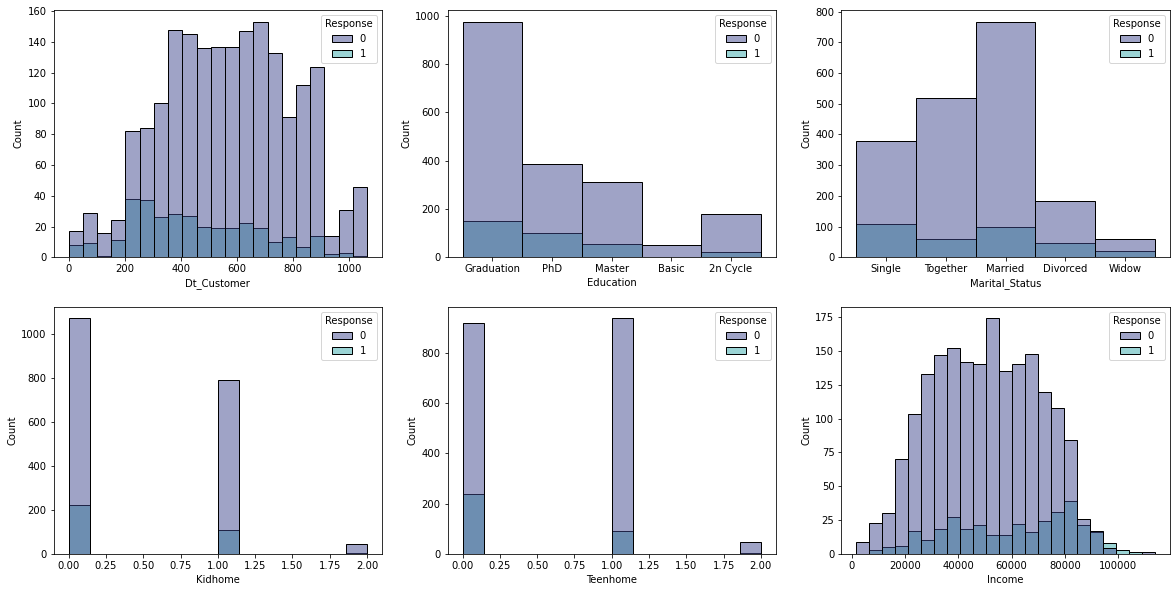

In [15]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = n_maga.columns

a = 0

for i in cols[8:14]:
  sns.histplot(data = n_maga, x = i, hue = 'Response', ax = axes[a], 
               palette = 'mako')
  a= a+1

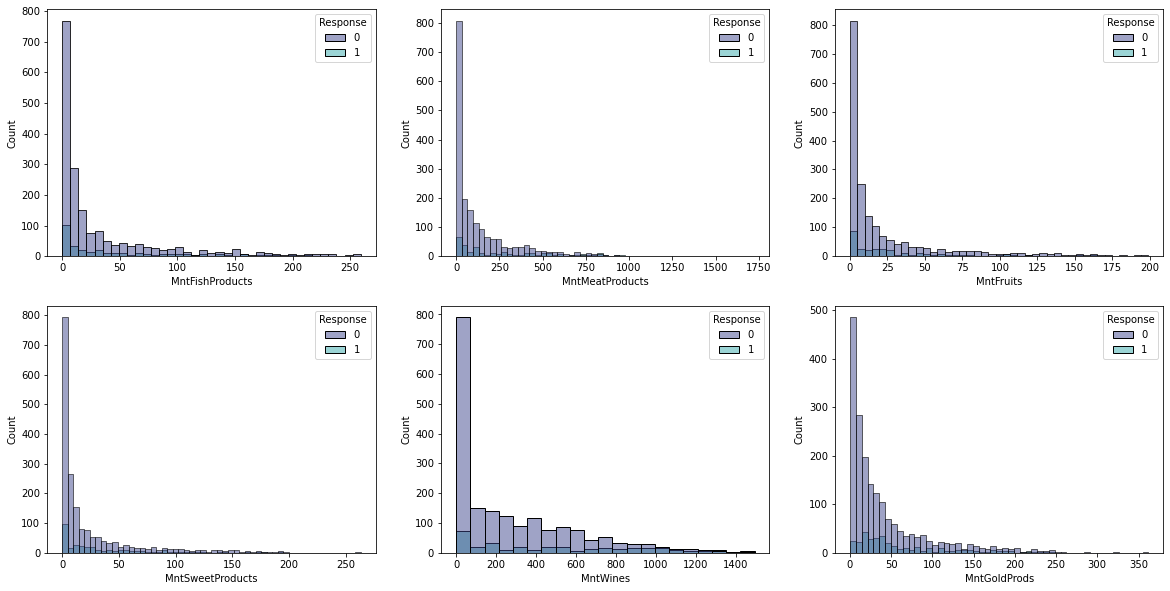

In [18]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6];a = 0

for i in cols[14:20]:
  sns.histplot(data = n_maga, x = i, hue = 'Response', ax = axes[a], 
               palette = 'mako')
  a= a+1


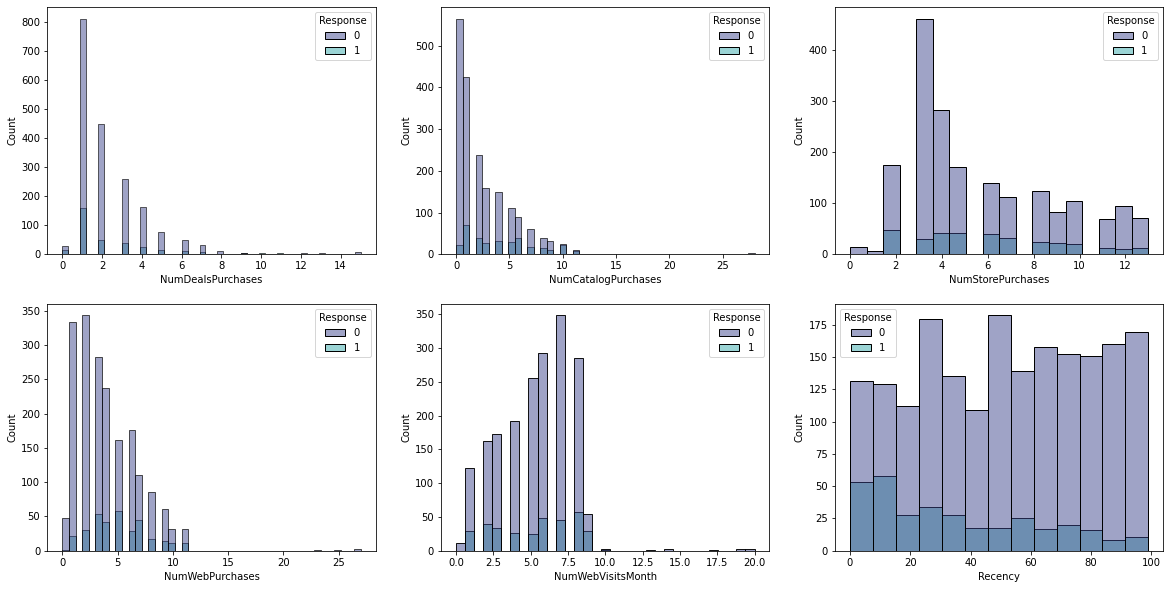

In [19]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5);
ax6 = plt.subplot(2,3,6);
axes = [ax1,ax2,ax3,ax4,ax5,ax6];a = 0

for i in cols[20:]:
  sns.histplot(data = n_maga, x = i, hue = 'Response', ax = axes[a], 
               palette = 'mako')
  a= a+1

In [23]:
enc = OneHotEncoder(sparse = False)
Marit_Stat = n_maga.groupby(['Marital_Status']).agg({'Marital_Status':'count'}).index
aux = enc.fit_transform(n_maga[['Marital_Status']])
n_maga[Marit_Stat] = aux[:,0:5]

n_maga.drop(columns = ['Marital_Status'],inplace=True)


In [25]:
Educ = n_maga.groupby(['Education']).agg({'Education':'count'}).index
aux = enc.fit_transform(n_maga[['Education']])
n_maga[Educ] = aux[:,0:5]
n_maga.head(10)
n_maga.drop(columns = ['Education'],inplace=True)

In [27]:
lim_df = n_maga[['Dt_Customer','Kidhome','Teenhome', 'Income', 'MntFishProducts',
               'MntMeatProducts', 'MntFruits','MntSweetProducts', 'MntWines',
               'MntGoldProds', 'NumDealsPurchases','NumCatalogPurchases', 
               'NumStorePurchases', 'NumWebPurchases','NumWebVisitsMonth', 
               'Recency', 'Divorced', 'Married', 'Single','Together', 'Widow',
               '2n Cycle', 'Basic', 'Graduation', 'Master','PhD']]
#lim_df=n_df.drop(columns='Response')
   

In [28]:
def appSVM(C,kernel,degree):
  pipeSVM = make_pipeline(StandardScaler(), svm.SVC(C=C,kernel=kernel,
                                                    degree = degree,
                                                    random_state=0)) 

  predictions = cross_val_predict(pipeSVM,os_X,os_y.squeeze(),cv=10)
  cm = confusion_matrix(os_y, predictions)
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  recall_0 = (cm[0,0])/cm[0,:].sum()
  recall_1 = (cm[1,1])/cm[1,:].sum()
  precision_0 = (cm[0,0])/cm[:,0].sum()
  precision_1 = (cm[1,1])/cm[:,1].sum()
  f1_0 = 2*recall_0*precision_0/(recall_0+precision_0)
  f1_1 = 2*recall_1*precision_1/(recall_1+precision_1)
  return accuracy, f1_0,f1_1

<AxesSubplot:xlabel='Response', ylabel='Count'>

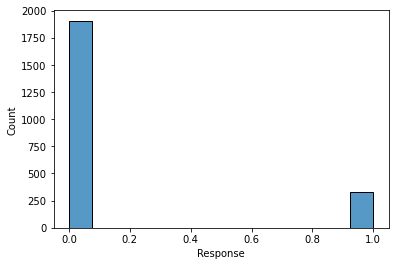

In [32]:
sns.histplot(data = n_maga.Response,palette = 'carol')

In [58]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

os = SMOTE(random_state=0, k_neighbors=5)
os_X,os_y =os.fit_resample(lim_df, n_df.Response)

ModuleNotFoundError: No module named 'imblearn'

In [59]:
sns.histplot(data = os_y,palette = 'mako')

NameError: name 'os_y' is not defined

In [60]:
def appSVM(C,kernel,degree):
  pipeSVM = make_pipeline(StandardScaler(), svm.SVC(C=C,kernel=kernel,
                                                    degree = degree,
                                                    random_state=0)) 

  predictions = cross_val_predict(pipeSVM,os_X,os_y.squeeze(),cv=10)
  cm = confusion_matrix(os_y, predictions)
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  recall_0 = (cm[0,0])/cm[0,:].sum()
  recall_1 = (cm[1,1])/cm[1,:].sum()
  precision_0 = (cm[0,0])/cm[:,0].sum()
  precision_1 = (cm[1,1])/cm[:,1].sum()
  f1_0 = 2*recall_0*precision_0/(recall_0+precision_0)
  f1_1 = 2*recall_1*precision_1/(recall_1+precision_1)
  return accuracy, f1_0,f1_1

In [61]:
cols=['C','kernel','degree','accuracy','f1_0','f1_1']
SVM_results = pd.DataFrame(columns=cols)
for C in [1,3,5,7,9,11,13]:
  for kernel in ['rbf','linear','poly']:
    for degree in [3,5]:
      accuracy, f1_0,f1_1 = appSVM(C,kernel,degree)
      SVM_results = SVM_results.append(pd.DataFrame([[C,kernel,degree,accuracy,
                                                      f1_0,f1_1]],columns=cols))
      
SVM_results.reset_index(drop=True,inplace=True)
SVM_results.drop(SVM_results[(SVM_results.kernel!='poly') & 
                             (SVM_results.degree==5)].index,inplace=True)
#fig, ax = plt.subplots(figsize=(12, 9))
plt.figure(figsize=(24, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=SVM_results,y='accuracy',x='C',hue='kernel',ax=ax1)
sns.lineplot(data=SVM_results,y='f1_0',x='C',hue='kernel',ax=ax2)
sns.lineplot(data=SVM_results,y='f1_1',x='C',hue='kernel',ax=ax3)

NameError: name 'os_X' is not defined

In [62]:
cols=['C','kernel','degree','accuracy','f1_0','f1_1']
SVM_results = pd.DataFrame(columns=cols)
for C in [1,3,5,7,9,11,13]:
  for kernel in ['rbf','linear','poly']:
    for degree in [3,5]:
      accuracy, f1_0,f1_1 = appSVM(C,kernel,degree)
      SVM_results = SVM_results.append(pd.DataFrame([[C,kernel,degree,accuracy,
                                                      f1_0,f1_1]],columns=cols))
      
SVM_results.reset_index(drop=True,inplace=True)
SVM_results.drop(SVM_results[(SVM_results.kernel!='poly') & 
                             (SVM_results.degree==5)].index,inplace=True)
#fig, ax = plt.subplots(figsize=(12, 9))
plt.figure(figsize=(24, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=SVM_results,y='accuracy',x='C',hue='kernel',ax=ax1)
sns.lineplot(data=SVM_results,y='f1_0',x='C',hue='kernel',ax=ax2)
sns.lineplot(data=SVM_results,y='f1_1',x='C',hue='kernel',ax=ax3)


NameError: name 'os_X' is not defined

In [63]:
def print_confMat (y,predictions):
  cm = confusion_matrix(y, predictions)
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  recall_0 = (cm[0,0])/cm[0,:].sum()
  recall_1 = (cm[1,1])/cm[1,:].sum()
  precision_0 = (cm[0,0])/cm[:,0].sum()
  precision_1 = (cm[1,1])/cm[:,1].sum()
  f1_0 = 2*recall_0*precision_0/(recall_0+precision_0)
  f1_1 = 2*recall_1*precision_1/(recall_1+precision_1)
  text = 'Accuracy = '+"{:.2f}".format(accuracy)+'; '+'f1_0 = '+"{:.2f}".format(f1_0)+'; '+'f1_1 = '+"{:.2f}".format(f1_1)+'; '
  fig, ax = plt.subplots(figsize=(12, 9))
  ax.grid(False); ax.set_title(text)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap=plt.cm.Blues,ax=ax)
  plt.show()
C=7;kernel='rbf';degree

3

In [64]:
C=7;kernel='rbf';degree=3;
pipeSVM = make_pipeline(StandardScaler(), svm.SVC(C=C,kernel=kernel,
                                                    degree = degree,
                                                    random_state=0)) 

predictions = cross_val_predict(pipeSVM,os_X,os_y.squeeze(),cv=10)

print_confMat (os_y, predictions)

NameError: name 'os_X' is not defined

In [65]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(lim_df, n_df.Response, 
                                                    test_size=0.2, 
                                                    random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
X_train = pd.DataFrame(data=os_data_X,columns=columns )
y_train= pd.DataFrame(data=os_data_y,columns=['Response'])


NameError: name 'SMOTE' is not defined

In [66]:
pipeSVM.fit(X_train, y_train.squeeze())
predictions = pipeSVM.predict(X_train)
print_confMat (y_train, predictions)

NameError: name 'X_train' is not defined

In [67]:
predictions = pipeSVM.predict(X_test)
print_confMat (y_test, predictions)


NameError: name 'X_test' is not defined